<a href="https://colab.research.google.com/github/SowmyaDontha88/Machine_Learning/blob/main/Naive_Bayes_SalaryData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from matplotlib.colors import ListedColormap
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.svm import SVC

# **Problem Statement -> Prepare a classification model using Naive Bayes for salary dataset**

In [ ]:
data_train = pd.read_csv('/content/SalaryData_Train.csv')
data_test = pd.read_csv('/content/SalaryData_Test.csv')

In [ ]:
data_train.head(4)

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K


In [ ]:
data_test.head(4)

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K


# **EDA**

In [ ]:
data = data_test.append(data_train)

<ipython-input-8-cfa417f7e0e8>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data_test.append(data_train)


In [ ]:
str_c = ["workclass","education","maritalstatus","occupation","relationship","race","sex","native"]

In [ ]:
number = LabelEncoder()

In [ ]:
for i in str_c:
  data_train[i] = number.fit_transform(data_train[i])
  data_test[i] = number.fit_transform(data_test[i])

In [ ]:
data_train.head(3)

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,5,9,13,4,0,1,4,1,2174,0,40,37,<=50K
1,50,4,9,13,2,3,0,4,1,0,0,13,37,<=50K
2,38,2,11,9,0,5,1,4,1,0,0,40,37,<=50K


In [ ]:
data_test.head(3)

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,2,1,7,4,6,3,2,1,0,0,40,37,<=50K
1,38,2,11,9,2,4,0,4,1,0,0,50,37,<=50K
2,28,1,7,12,2,10,0,4,1,0,0,40,37,>50K


In [ ]:
data_train = data_train.replace({'Salary':{' >50K': 1, ' <=50K': 2}})
data_test = data_test.replace({'Salary':{' >50K': 1, ' <=50K': 2}})

Labelling the dataset into two portions.

Label 1: Who's salary is greater than 50K

Label 2:Who's salary is less than 50K

In [ ]:
data_final = data_train.append(data_test)

<ipython-input-20-c500fbb7d6f2>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_final = data_train.append(data_test)


In [ ]:
data_final.head(3)

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,5,9,13,4,0,1,4,1,2174,0,40,37,2
1,50,4,9,13,2,3,0,4,1,0,0,13,37,2
2,38,2,11,9,0,5,1,4,1,0,0,40,37,2


In [ ]:
data_final.shape

(45221, 14)

In [ ]:
data_final.describe()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
count,45221.000000,45221.000000,45221.000000,45221.000000,45221.000000,45221.000000,45221.000000,45221.000000,45221.000000,45221.000000,45221.000000,45221.000000,45221.000000,45221.000000
mean,38.548086,2.204507,10.313217,10.118463,2.585148,5.969572,1.412684,3.680281,0.675062,1101.454700,88.548617,40.938038,35.431503,1.752151
std,13.217981,0.958132,3.816992,2.552909,1.500460,4.026444,1.597242,0.832361,0.468357,7506.511295,404.838249,12.007640,5.931380,0.431769
min,17.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
25%,28.000000,2.000000,9.000000,9.000000,2.000000,2.000000,0.000000,4.000000,0.000000,0.000000,0.000000,40.000000,37.000000,2.000000
50%,37.000000,2.000000,11.000000,10.000000,2.000000,6.000000,1.000000,4.000000,1.000000,0.000000,0.000000,40.000000,37.000000,2.000000
75%,47.000000,2.000000,12.000000,13.000000,4.000000,9.000000,3.000000,4.000000,1.000000,0.000000,0.000000,45.000000,37.000000,2.000000
max,90.000000,6.000000,15.000000,16.000000,6.000000,13.000000,5.000000,4.000000,1.000000,99999.000000,4356.000000,99.000000,39.000000,2.000000


In [ ]:
data_final.isnull().any()

age              False
workclass        False
education        False
educationno      False
maritalstatus    False
occupation       False
relationship     False
race             False
sex              False
capitalgain      False
capitalloss      False
hoursperweek     False
native           False
Salary           False
dtype: bool

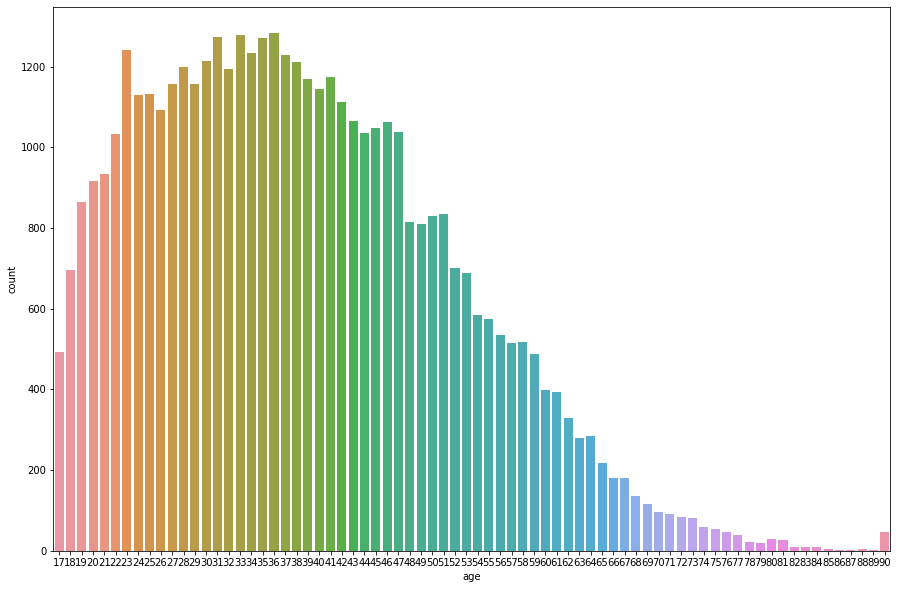

In [ ]:
plt.figure(figsize=(15,10))
sns.countplot(data_final,x='age')
plt.show()

In [ ]:
import warnings
warnings.filterwarnings('ignore')

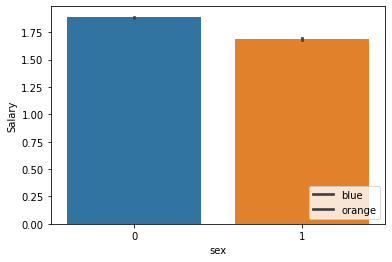

In [ ]:
sns.barplot(data=data_final,x="sex",y='Salary')
plt.legend(["blue", "orange"], loc ="lower right")
plt.show()

The bar plot shows that male sex gender have highest salary package.

<Figure size 1080x720 with 0 Axes>

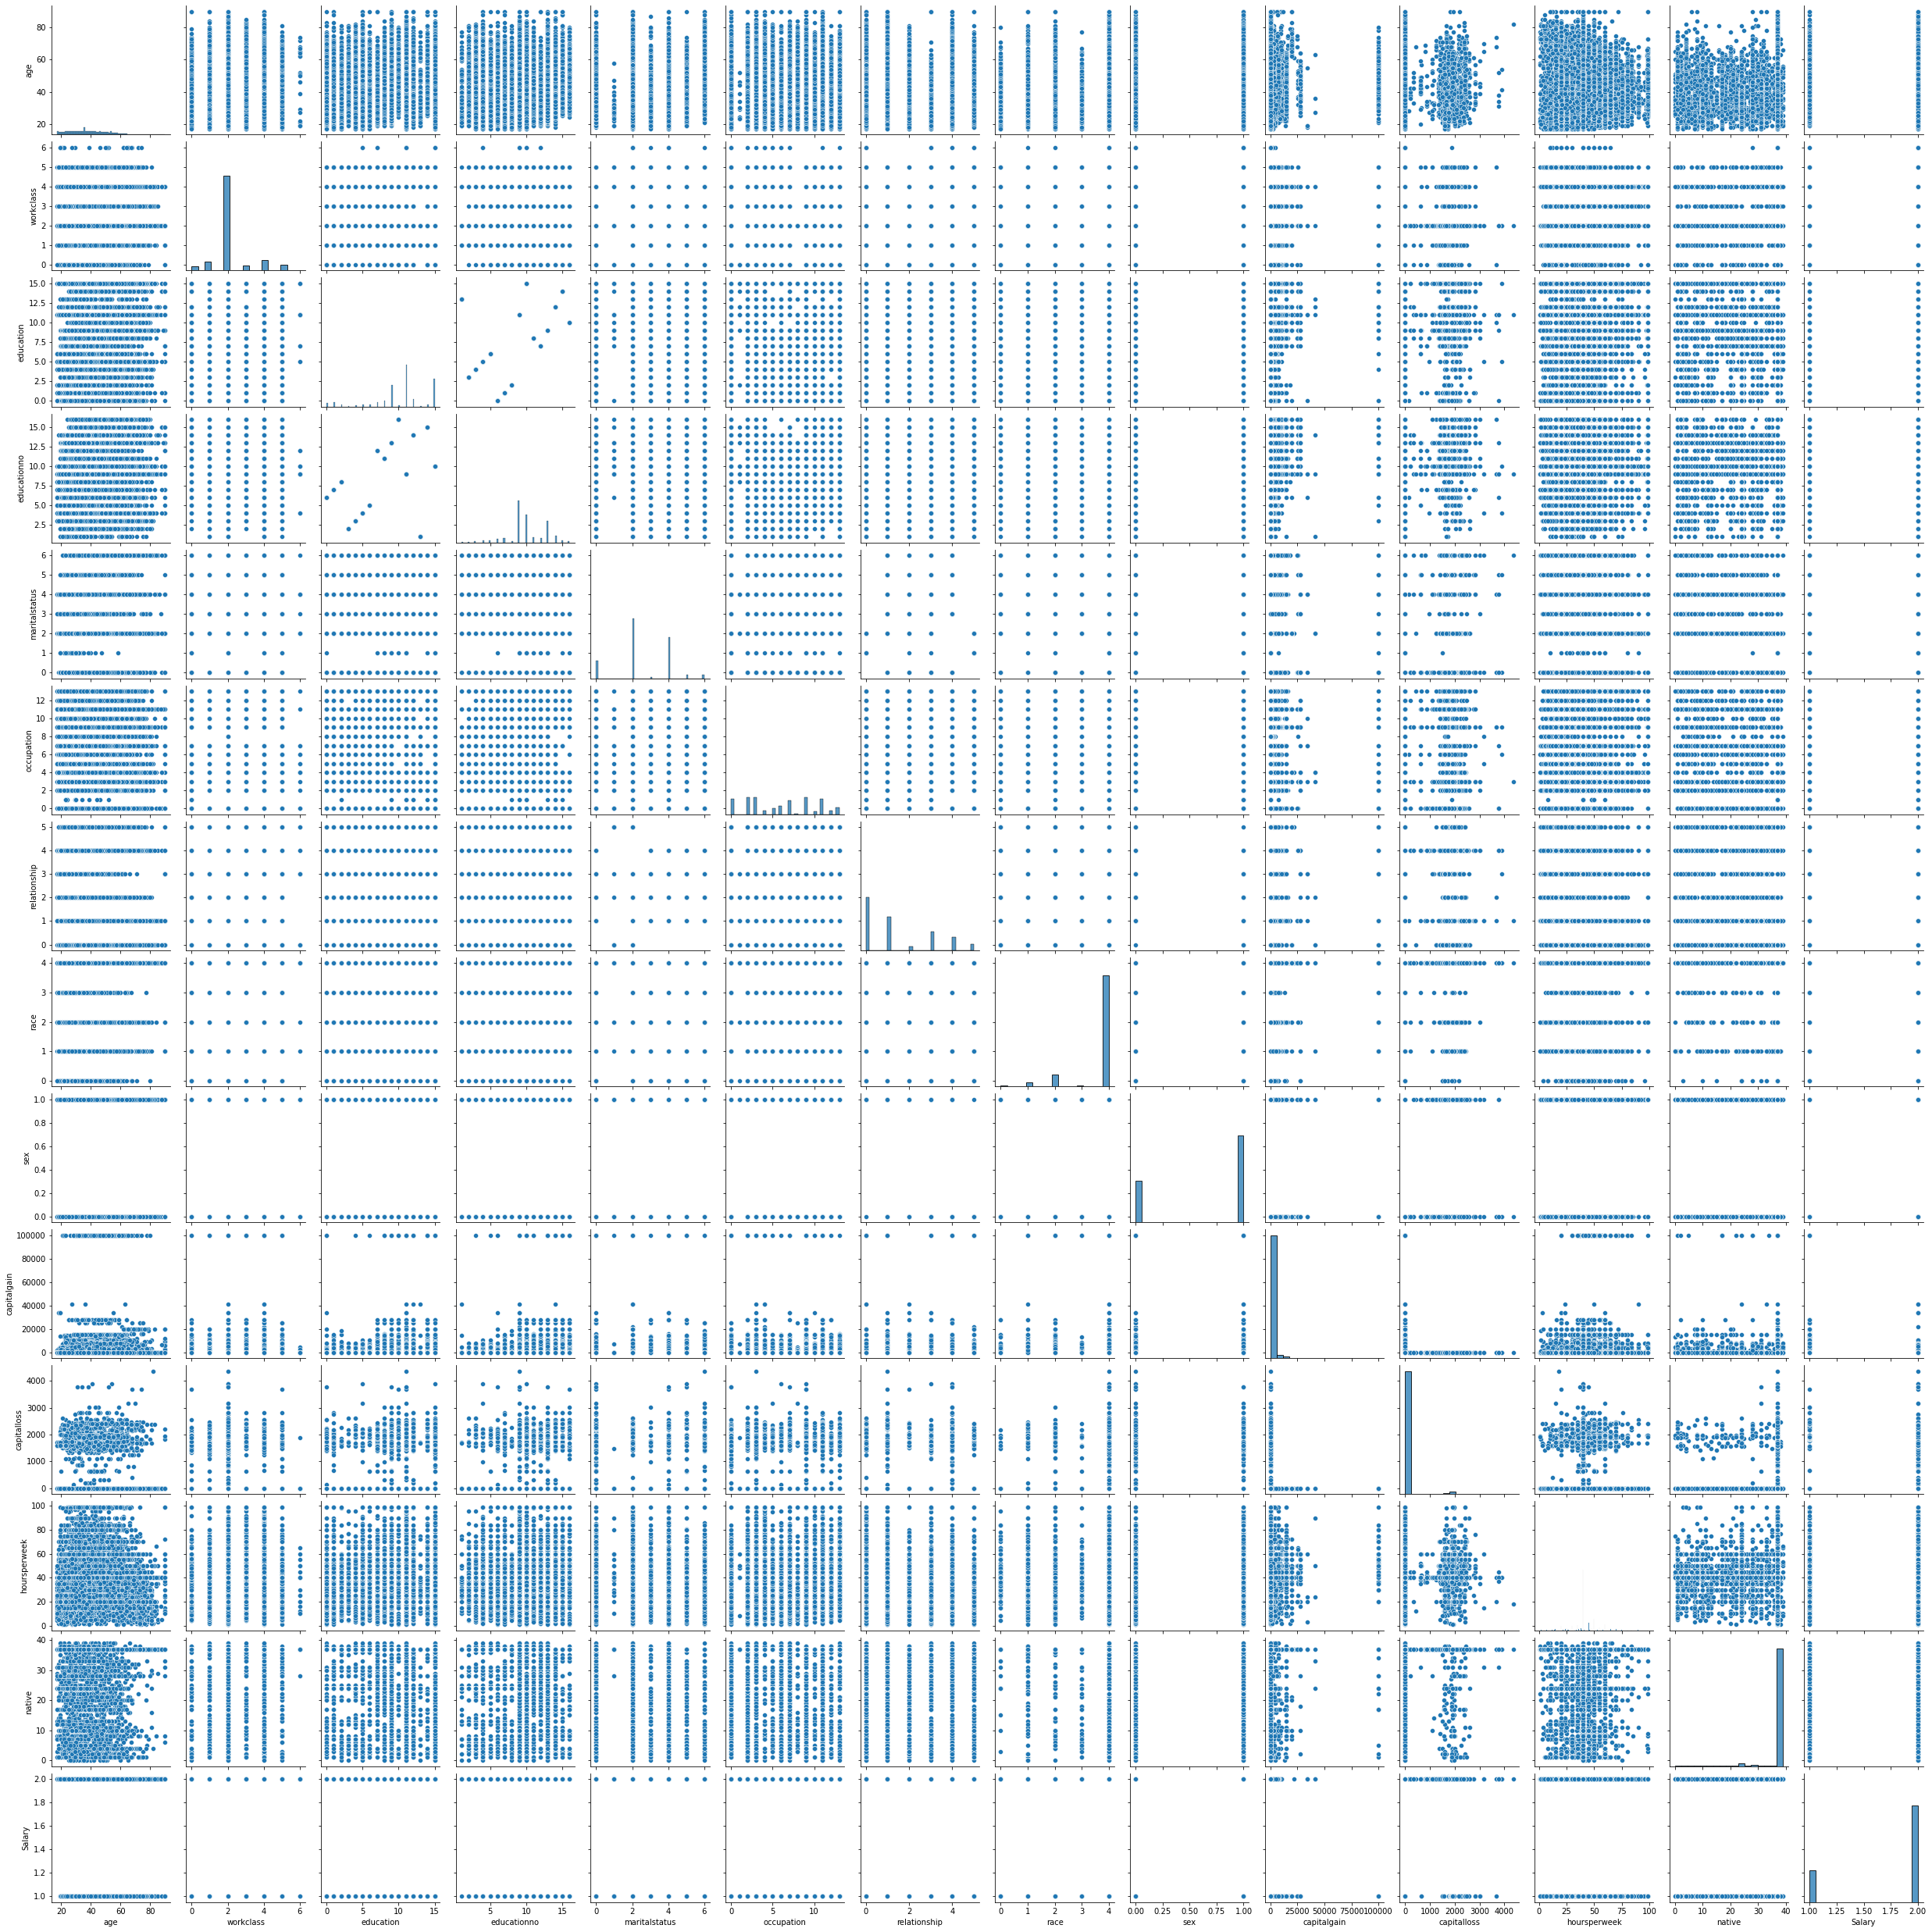

<Figure size 1080x720 with 0 Axes>

In [ ]:
sns.pairplot(data_final)
plt.figure(figsize=(15,10))

Finding correlation between attributes.

In [ ]:
corr = data_final.corr()

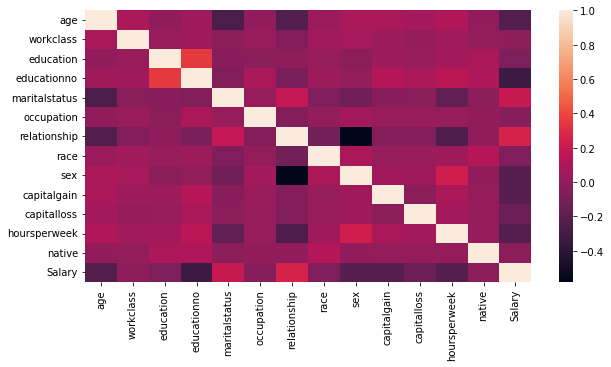

In [ ]:
plt.figure(figsize=(10,5))
sns.heatmap(corr)
plt.show()

In [ ]:
plt.rcParams["figure.figsize"] = 9,5

Skew: -0.31062061074424
Kurtosis: 0.6350448194491634


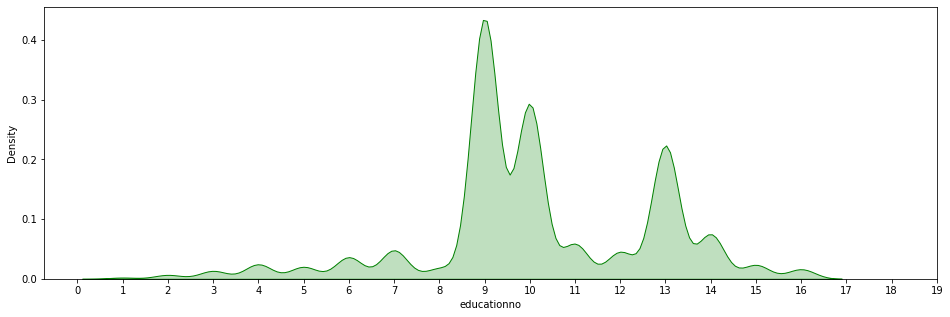

In [ ]:
plt.figure(figsize=(16,5))
print("Skew: {}".format(data_final['educationno'].skew()))
print("Kurtosis: {}".format(data_final['educationno'].kurtosis()))
ax = sns.kdeplot(data_final['educationno'],shade=True,color='g')
plt.xticks([i for i in range(0,20,1)])
plt.show()

The above graph clearly shows that data is negatively skewed and has low kurtosis, in addition to that the maximum number of education years lie in between 8-10.

In [ ]:
dfa = data_final[data_final.columns[0:13]]
obj_colum = dfa.select_dtypes(include='object').columns.tolist()

In [ ]:
num_columns = dfa.select_dtypes(exclude='object').columns.tolist()

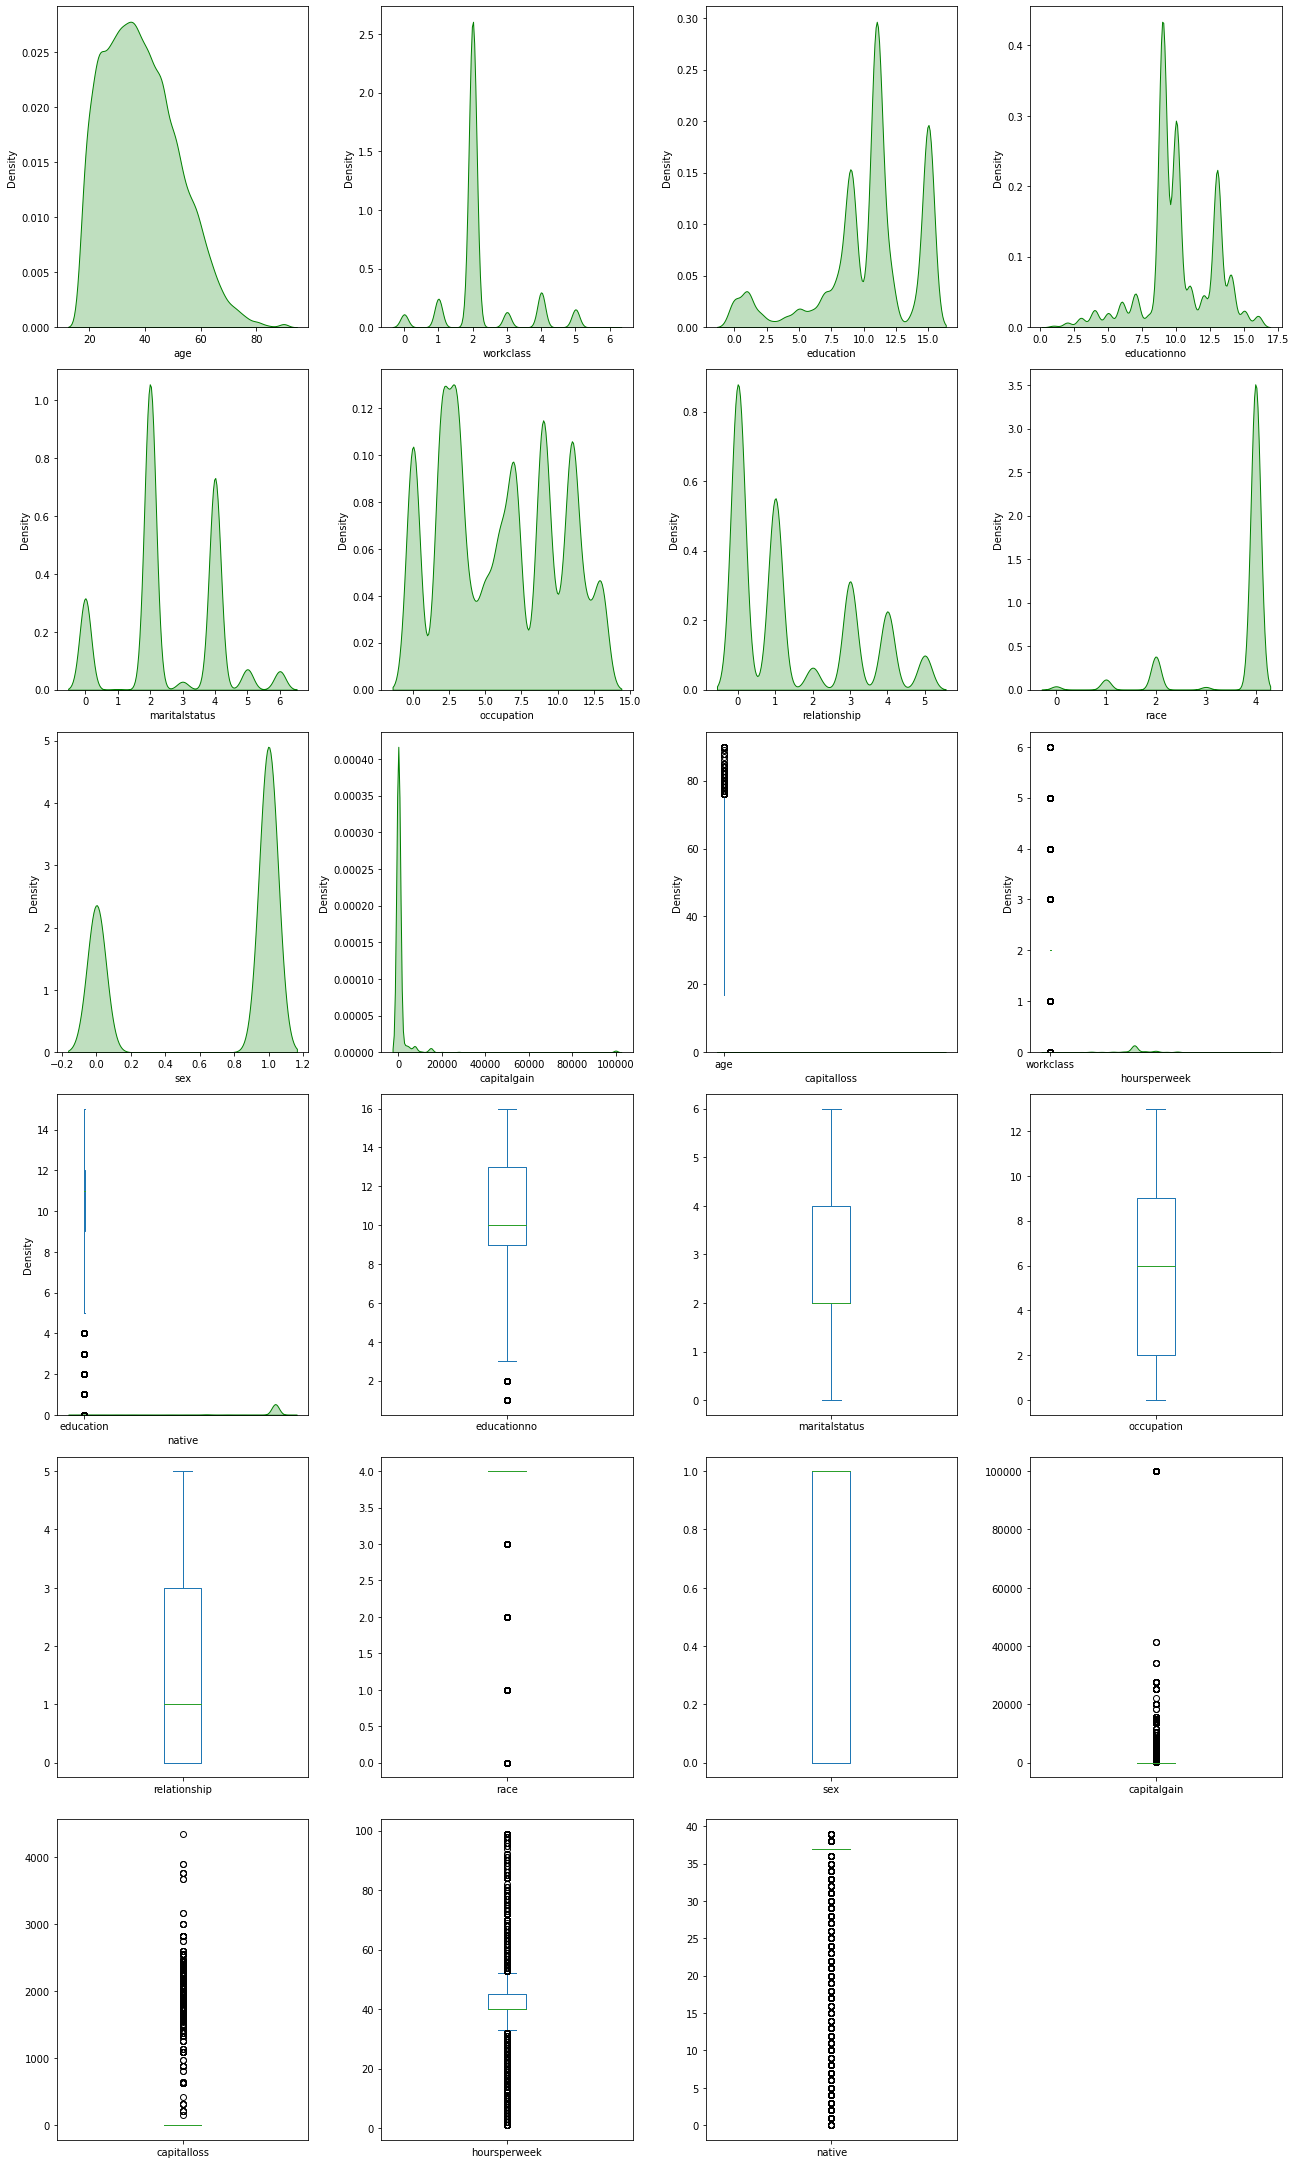

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native
skewness,0.532784,1.148931,-0.945666,-0.310621,-0.006760,0.107141,0.829192,-2.518388,-0.747594,11.788871,4.517536,0.340536,-4.173813
kurtosis,-0.155931,2.329983,0.773506,0.635045,-0.538981,-1.249883,-0.697095,5.350390,-1.441168,150.147899,19.376085,3.201287,17.322823


In [ ]:
plt.figure(figsize=(18,40))
for i,col in enumerate(num_columns,1):
    plt.subplot(8,4,i)
    sns.kdeplot(data_final[col],color='g',shade=True)
    plt.subplot(8,4,i+10)
    data_final[col].plot.box()
plt.tight_layout() 
plt.show()
num_data = data_final[num_columns]
pd.DataFrame(data=[num_data.skew(),num_data.kurtosis()],index=['skewness','kurtosis'])

# **Naive Bayes**

In [ ]:
x_train = data_train.iloc[:,0:13]
y_train = data_train.iloc[:,13]
x_test = data_test.iloc[:,0:13]
y_test = data_test.iloc[:,13]

# **Gaussian Naive Bayes**




In [ ]:
clsfrgnb = GaussianNB()

In [ ]:
clsfrgnb.fit(x_train, y_train)

GaussianNB()

In [ ]:
y_pred_gnb = clsfrgnb.predict(x_test)

In [ ]:
pd.crosstab(y_test.values.flatten(),clsfrgnb)

col_0,GaussianNB()
row_0,
1,3700
2,11360


In [ ]:
print ("Accuracy",np.mean(y_pred_gnb==y_test.values.flatten()))

Accuracy 0.7946879150066402


# **Multinomial Naive Bayes**

In [ ]:
clsfrmnb = MultinomialNB()

In [ ]:
clsfrmnb.fit(x_train, y_train)

MultinomialNB()

In [ ]:
y_pred_mnb = clsfrmnb.predict(x_test)

In [ ]:
pd.crosstab(y_test.values.flatten(),clsfrmnb)

col_0,MultinomialNB()
row_0,
1,3700
2,11360


In [ ]:
print ("Accuracy",np.mean(y_pred_mnb==y_test.values.flatten()))

Accuracy 0.7749667994687915


# **Conclusion**- Using Gaussian Naive bayes model the accuracy is found out to be better and the model can be able to correctly identify the labels.

# **Cross Validation**

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [ ]:
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))

In [ ]:
results = []
names = []
scoring = 'accuracy'

In [ ]:
print('Model ')
for name, model in models:
	kfold = KFold(n_splits=10, random_state=None)
	cv_results = cross_val_score(model, x_train, y_train, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	txt = "%s :  %f  (%f)" % (name, cv_results.mean(), cv_results.std())
	print(txt)

Model :
LR :  0.801466  (0.006339)
LDA :  0.810650  (0.008475)
KNN :  0.834123  (0.005619)
CART :  0.807367  (0.004315)
NB :  0.795498  (0.006570)


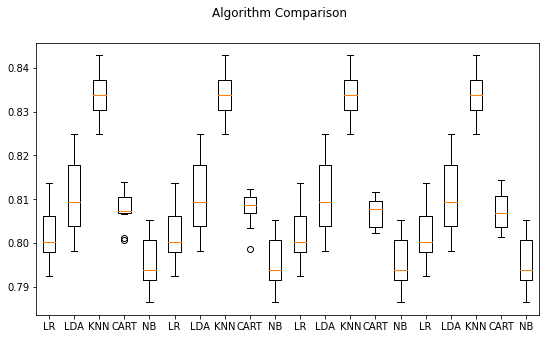

In [ ]:
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

# **Conclusion**- Using KNN supervised machine learning for this dataset will give us highest accuracy among all the others.